# Phase 01 -  Data Wrangling 
###  First we need to read and explore each dataset, find any "bad formatation" or null value.
    Dataset:  PEA07-Estimated_Pupulation-1996-2017.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


#Datasets:
pea07="./Datasets/PEA07-Estimated_Pupulation-1996-2017.csv"
pea04 ="./Datasets/PEA04-Estimated_Pupulation-2011-2023.csv" 
cjq01 ="./Datasets/CJQ01-recorded_crime_2002-2023.csv"



# ingnor warnings
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings




# the fist dataset will be pop01_df
pop01_df=pd.read_csv(pea07)
pop01_df.head()


,Statistic,Age Group,Sex,Year,UNIT,State,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West
0,Estimated Population (Persons in April),All ages,Both sexes,1996,Thousand,3626.1,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6
1,Estimated Population (Persons in April),All ages,Both sexes,1997,Thousand,3664.3,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1
2,Estimated Population (Persons in April),All ages,Both sexes,1998,Thousand,3703.1,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8
3,Estimated Population (Persons in April),All ages,Both sexes,1999,Thousand,3741.6,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3
4,Estimated Population (Persons in April),All ages,Both sexes,2000,Thousand,3789.5,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1


## Now we need to drop unicessary columns, and rename the other ones.
     To prevent any error if run this cell twice, we can create a function to rename columns.
     
     After that, we can organize the columns using the method loc, it is used to select a subset of rows and columns from a DataFrame.



In [5]:
# This funcion receive the variables: df = dataset, old_col = original column name  and  new_col = new column name.
# It  tries to rename the column, if the column doenst exist or it is alread renamed it will go to except.

def rename_col(df, old_col, new_col):
  try:
    df = df.rename(columns={old_col: new_col})
    return df
  except KeyError:
    print(f"Column {column} does not exist or has already been renamed.")
    pass


# lets call the function passiing the parameters
pop01_df = rename_col(pop01_df, 'State', 'Total')


# Now the coluumn is renamed, Lets get the columns in the right local and right name.
pop01_df = pop01_df.loc[:,['Year', 'Border',
       'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West', 'South-East',
       'South-West', 'Total', 'UNIT']]

# showing the first 5 rowns of the dataset
pop01_df.head()



,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,Thousand
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,Thousand
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,Thousand
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,Thousand
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,Thousand


# Now, let's check if there are any null variables.

    We can use the method '.info and .isnull to check some information about the dataset.
    

In [6]:
pop01_df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        22 non-null     int64  
 1   Border      22 non-null     float64
 2   Midland     22 non-null     float64
 3   West        22 non-null     float64
 4   Dublin      22 non-null     float64
 5   Mid-East    22 non-null     float64
 6   Mid-West    22 non-null     float64
 7   South-East  22 non-null     float64
 8   South-West  22 non-null     float64
 9   Total       22 non-null     float64
 10  UNIT        22 non-null     object 
dtypes: float64(9), int64(1), object(1)
memory usage: 2.0+ KB


In [ ]:
pop01_df.isnull().sum() 


# Now that we have organized and checked the first dataset, let's do the same with the second dataset:
      dataset: PEA04-Estimated_Pupulation-2011-2023.csv

In [7]:
# pandas and numpy already imported at the begining of this notebook
pop02_df = pd.read_csv(pea04)
pop02_df.head()



,STATISTIC,Year,Age Group,Sex,UNIT,State,Border,West,Mid-West,South-East,South-West,Dublin,Mid-East,Midland
0,Estimated Population (Persons in April),2011,All ages,Both sexes,Thousand,4574.9,391.9,440.8,466.8,410.3,662.3,1261.5,657.4,283.8
1,Estimated Population (Persons in April),2012,All ages,Both sexes,Thousand,4593.7,392.1,439.4,470.6,411.6,667.4,1260.6,664.7,287.2
2,Estimated Population (Persons in April),2013,All ages,Both sexes,Thousand,4614.7,393.1,441.7,470.7,413.7,673.8,1265.9,666.4,289.3
3,Estimated Population (Persons in April),2014,All ages,Both sexes,Thousand,4645.4,392.0,441.1,471.8,413.5,679.5,1286.4,671.4,289.8
4,Estimated Population (Persons in April),2015,All ages,Both sexes,Thousand,4687.8,391.9,442.2,473.4,415.6,678.9,1315.3,679.3,291.1


    
# To rename the column in this dataframe, we can use the function we created for the first dataframe. 

    Functions are a part of 'Functional Programming,' and the advantage of functions is that we can make the code reusable, and we don't need to write the same code over and over again

In [8]:
## Now we need to drop unicessary columns, and rename the other ones.
# To prevent any error if run this cell twice, we can create a function to rename columns.

pop02_df = rename_col(pop02_df, 'State', 'Total')


pop02_df = pop02_df.loc[:,['Year', 'Border',
       'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West', 'South-East',
       'South-West', 'Total', 'UNIT']]


pop02_df.head()



,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,2011,391.9,283.8,440.8,1261.5,657.4,466.8,410.3,662.3,4574.9,Thousand
1,2012,392.1,287.2,439.4,1260.6,664.7,470.6,411.6,667.4,4593.7,Thousand
2,2013,393.1,289.3,441.7,1265.9,666.4,470.7,413.7,673.8,4614.7,Thousand
3,2014,392.0,289.8,441.1,1286.4,671.4,471.8,413.5,679.5,4645.4,Thousand
4,2015,391.9,291.1,442.2,1315.3,679.3,473.4,415.6,678.9,4687.8,Thousand


##  As the second dataset has data from 2011 to 2023. We need to filter the first dataframe, getting data from 1996 to 2010, and after that, we will merge the dataframes into one. We'll call it 'population_df

In [ ]:
# filter second dataset, to get values from 2018 to 2023
pop01_df = pop01_df[(pop01_df['Year'] <= 2010)]


#  Merging process

    When we merge dataframes, pandas will create columns _x and _y, and fill the new rows with "NaN" (null) values.  
    
    To merge DataFrames properly, we need to perform the following tasks:
    * Merge datasets
    * Fill the NaN values in the _y columns with the respective value of _x
    * Drop the _x columns
   
     

In [9]:
# Merge the two DataFrames on the 'Year' column
population_df = pop01_df.merge(pop02_df, on='Year', how='outer')
population_df.head()

,Year,Border_x,Midland_x,West_x,Dublin_x,Mid-East_x,Mid-West_x,South-East_x,South-West_x,Total_x,...,Border_y,Midland_y,West_y,Dublin_y,Mid-East_y,Mid-West_y,South-East_y,South-West_y,Total_y,UNIT_y
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we have columns _x and _y. We need to fill the NaN values in the _x columns with values from the corresponding _y columns.

We will create a loop to check the column names in each item of a list called 'column_names.' If the column name ends with _x, we will fill it with values from the corresponding column ending in _y."

In [10]:

# Getting the collumns names
column_names = population_df.columns

# for loop to fill the _x columns
for column_name in population_df.columns:
    if column_name.endswith('_x'):
        population_df[column_name].fillna(population_df[column_name[:-2]+'_y'], inplace=True)
    
population_df.head() 

,Year,Border_x,Midland_x,West_x,Dublin_x,Mid-East_x,Mid-West_x,South-East_x,South-West_x,Total_x,...,Border_y,Midland_y,West_y,Dublin_y,Mid-East_y,Mid-West_y,South-East_y,South-West_y,Total_y,UNIT_y
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#function to rename the columns merged,  remove the '_x' at the end.
# function rename_columns  will check into columns list, and each column ended in _x, the _x (-2 letters) will be removed.

def rename_columns_x(df):

  # Create a list of the new column names.
  new_column_names = []
  for column_name in population_df.columns:
    if column_name.endswith('_x'):
      new_column_name = column_name[:-2]
    else:
      new_column_name = column_name

    new_column_names.append(new_column_name)

  # Rename the columns of the DataFrame.
  population_df.columns = new_column_names

  return df


# calling the function to rename the columns of the DataFrame.
population_df = rename_columns_x(population_df)

population_df.columns





Index(['Year', 'Border', 'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West',
       'South-East', 'South-West', 'Total', 'UNIT', 'Border_y', 'Midland_y',
       'West_y', 'Dublin_y', 'Mid-East_y', 'Mid-West_y', 'South-East_y',
       'South-West_y', 'Total_y', 'UNIT_y'],
      dtype='object')

In [13]:
# This for loop will drop every column ended with _y 
for col in population_df.columns:
    if col.endswith("_y"):
        population_df.drop(col, axis=1, inplace=True)

population_df

,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,Thousand
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,Thousand
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,Thousand
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,Thousand
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,Thousand
5,2001,425.0,220.5,368.6,1108.2,401.2,335.3,416.5,572.2,3847.2,Thousand
6,2002,432.5,225.4,380.3,1122.8,412.6,339.6,423.6,580.4,3917.2,Thousand
7,2003,439.6,230.4,389.1,1133.2,426.5,342.4,430.4,588.4,3979.9,Thousand
8,2004,449.8,236.4,394.1,1144.8,440.0,345.6,438.0,596.4,4045.2,Thousand
9,2005,457.5,241.9,405.6,1160.6,456.9,353.1,449.0,609.2,4133.8,Thousand


In [14]:
# Checking if is there any null variable or misformated.
print(population_df.isnull().sum())
print(population_df.info())

Year          0
Border        0
Midland       0
West          0
Dublin        0
Mid-East      0
Mid-West      0
South-East    0
South-West    0
Total         0
UNIT          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        28 non-null     int64  
 1   Border      28 non-null     float64
 2   Midland     28 non-null     float64
 3   West        28 non-null     float64
 4   Dublin      28 non-null     float64
 5   Mid-East    28 non-null     float64
 6   Mid-West    28 non-null     float64
 7   South-East  28 non-null     float64
 8   South-West  28 non-null     float64
 9   Total       28 non-null     float64
 10  UNIT        28 non-null     object 
dtypes: float64(9), int64(1), object(1)
memory usage: 2.5+ KB
None


# Exploring the Recorded crime dataset
    Dataset: CJQ01-recorded_crime_2002-2023.csv"

In [ ]:
# cjq01  variable already inicialized at the begining of this notebook.

crime_df=pd.read_csv(cjq01)
crime_df.head(10)

# For this dataset we need to group by year, removing tue "Quarter" we will keep the "Type of Offence" to explore some plots.

In [12]:
# Dropping the fist column - It is not necessary
# To garantee thate we dont drop the wrong column, we can create a conditional, comparing the column name.

if crime_df.columns[0] == 'STATISTIC Label':
    crime_df = crime_df.drop(crime_df.columns[0], axis=1)

crime_df.head()


NameError: name 'crime_df' is not defined

As the data is presented in quarters, I will group it into annual periods. This will simplify the analysis and prevent the introduction of noise

In [ ]:

# To remove the 'Quarter' from each year, we need to split the 'Quarter' column into a list of strings
crime_df['Quarter'] = crime_df['Quarter'].str.split('Q')

# Now we can get the first element of the list, the year.
crime_df['Quarter'] = crime_df['Quarter'].str.get(0)


# Also, we can rename the column Quarter to Year, using the function I have created.
# The function uses 3 inputs: dataset name, current column name, new column name
   
crime_df = rename_col(crime_df, 'Quarter', 'Year')


crime_df.head(5)


In [ ]:
crime_df.info()

In [ ]:
crime_df.isnull().sum() 

### We can observe that in this dataset, the column "Year" is shown as object , and there is one value null on the column VALUE. lets check it.
    We chan check if the column 'Year" has only numbers trying to convert it to numeric.
    

In [15]:
# Trying to convert column 'Year' into numeric:

crime_df['Year'] = pd.to_numeric(crime_df['Year'])
print(crime_df.dtypes)



NameError: name 'crime_df' is not defined

In [ ]:
crime_df.sort_values(by='VALUE', ascending=True)


crime_df.head(10)

As we have a Nan value in only one row, the best approach is drop the row,  this will ensures that the dataset contains only complete and reliable information.alculations due to the replaced zeros
To remove the NaN row, we can use the method '.dropna()'

In [ ]:
crime_df = crime_df.dropna()

#  Phase 2 - EDA - Visualization
    Now that we have all data organized and clean, we can perform some Visualizations and Plots, First We can get some 
    insights about the population growth, using the "population_df" dataframe. And after we can check some information about the crime rate.
    
 

#The first plot will be a line chart with the population grow over the time

# Outliers
    Outliers are data points significantly different from the rest of the data, Outliers can be caused by errors in data collection or entry, or they can be genuine data points that represent unusual or unexpected events.
    By plotting a boxplor, we can detect outliers.
  
There are a number of different methods for detecting outliers. One common approach is to use statistical methods to calculate the mean, median, and standard deviation of the data. Outliers are then identified as data points that fall outside of a certain number of standard deviations from the mean.

Another approach to detecting outliers is to use 
visualization methods, such as scatter plots and boxplots. These methods can be used to identify data points that are visually distinct from the rest of the data

In [ ]:
import seaborn as sns 
# Get the columns names using: population_df.columns  and plot the boxplot with specific column

plt.figure(figsize=(10, 5)) # set the figure size
plt.title("Boxplot of Population by Region") # Add a title to the boxplot
sns.boxplot(data=population_df[['Border', 'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West',
       'South-East', 'South-West']])

# Show the plot
plt.show()

## From this boxplot we can get some Insights:
    The median population of the "Border" region is the highest
    Overall, the boxplot shows that there is a significant variation in population between the different regions. The Border and West regions have the highest populations, while the South-West region has the lowest population.

Here are a question that we can answer based on the boxplot:

    Which region has the highest median population? 
        The Border region has the highest median population.

# From the Line charts we can get the following insights:

* Trends: we can identify trends, such as whether the population is increasing, decreasing, or remaining stable.
* Relationships: We can identify relationship between two variables.
* Comparisons: We can compare two or more variables over time. This can be useful for identifying differences between regions.


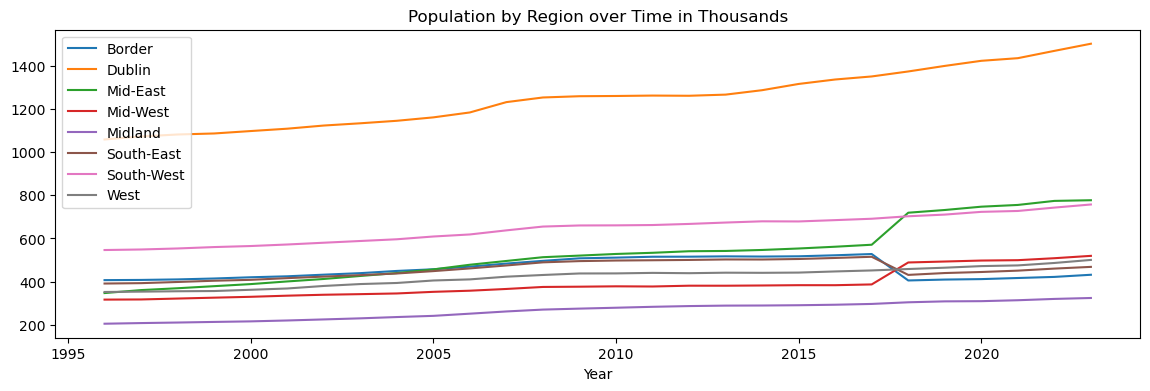

In [16]:
import matplotlib.pyplot as plt

# Resize the chart to be wider
fig, ax = plt.subplots(figsize=(14, 4))

# Here I will plot a line chart of the population growth for each `Region`
population_df.plot(kind='line', x='Year', y=['Border', 'Dublin', 'Mid-East', 'Mid-West', 'Midland', 'South-East', 'South-West',  'West'], ax=ax)

ax.set_title('Population by Region over Time in Thousands')
plt.show()

### Insights:

One of the most obvious insights is the overall growth of Ireland's population over time, The chart shows the regional variation in population growth. Some regions, such as Dublin and the surrounding counties, have experienced more rapid growth than others. This is due to a number of factors, including economic opportunity and migration.

Also, its possible observe some anomalies in the lines blue and brown, show the decrease of the population.

Finally, the chart can provide insights into the future of Ireland's population. By analyzing the trends in population growth, demographers can make predictions about the future size and distribution of the population

# Pie Chart
    From Pie charts we can get following insights:

    Composition: From Pie charts we can get how a whole is divided into its constituent parts.
    Comparisons: We can also compare the population of each region. This can be useful for identifying similarities and differences between different regions.
    Trends: We can also plot more than one Pie chart and observe how it changes over time.

### Note:
    Pie chart need a 1D array as input. so we need to convert the data variable to a 1D array. 
    Using numpy.ravel() function we can flattens a NumPy array into a 1D array.
    
   ###  In this case, we will plot two Pie Carts one with data from 2013 and other with data from 2023:
    From these charts, we can observe any change in 10 years.

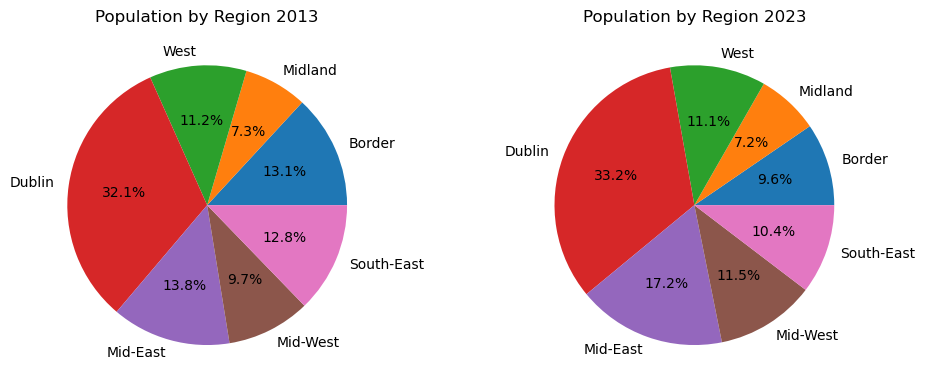

In [17]:
# First we need to create two new dataframes and filter the data with each year.

# Get the data from the table, filtered by date 2013
df_2013 = population_df[population_df['Year'].values == 2013]
df_2013= df_2013.iloc[:,1:8]
df_2013= df_2013.values


# Get the data from the table filtered by 2023.
df_2023 = population_df[population_df['Year'].values == 2023]


df_2023= df_2023.iloc[:,1:8]
df_2023 = df_2023.values


# Flatten the data array into a 1D array
df_2013 = np.ravel(df_2013)
df_2023 = np.ravel(df_2023)


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the 2020 pie chart
axs[0].pie(df_2013, labels=["Border", "Midland", "West", "Dublin", "Mid-East", "Mid-West", "South-East"], autopct="%1.1f%%")
axs[0].set_title('Population by Region 2013')


# Plot the 2023 pie chart
axs[1].pie(df_2023, labels=["Border", "Midland", "West", "Dublin", "Mid-East", "Mid-West", "South-East"], autopct="%1.1f%%")
axs[1].set_title('Population by Region 2023')


# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()




### Insights:

From the pie chart, we can observe that the biggest region in population Is the Dublin region and the smallest is Midland.
	Comparing both pie charts, we can see the following changes:
  * The Dublin region has become even more populous over the past decade, increasing its population share from 32.1% to 33.2%.
  * The Border region has also experienced a slight increase in population share, from 16.5% to 16.9%.
Overall, the population of Ireland is becoming more concentrated in the Dublin region. This may be due to a number of factors, such as job opportunities, educational opportunities, and cultural amenities.


#  Crime Rate  - Statistics
Now that we have an overall about the population, lets dive into the crime rate dataframe, using some statistical approach: Lets call it: "crime_df"

# libraries:
### For statistics we need to import these libraries (already imported on the begining of this notebook)
     from scipy import stats
     from empiricaldist import Pmf, Cdf
     from matplotlib.ticker import PercentFormatter



In [ ]:

from scipy import stats
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

crime_df.head()

## Using the method describe, we can get important information from the result
### Ex:
    * mean: The average of crime over these types.
    * max: The largest value in the type of crime.
    * median: (middle value) of recorded crime incidents.
    * minimum: and maximum values in the dataset.
    * standard deviation to measure the spread of the data.


In [ ]:
crime_df['VALUE'].describe()

# Insights

From this “.describe()” method, we can get some insights:
*    There is a wide range of 'VALUE' in the dataset, with values ranging from 0 to 20,707.
*    The high standard deviation suggests that there is a significant dispersion of values.
*    The median value of 109 indicates the central tendency, but the mean is higher at 1,560.19, suggesting potential skewness in the data.


# Bins
    A histogram is a representation of the distribution of a dataset. It groups the data into intervals (bins) and displays the frequency or count of data points within each bin

In [ ]:
crime_df.hist(column='VALUE', bins=50); 



# Insights:
   
    There are some insights that you can get from the bin plot:

    The distribution of the VALUE column is skewed to the right. This means that there are more values on the right side of the distribution than on the left side.
    The median value of the VALUE column is between 10,000 and 15,000.

# PMF and CDF

Pmf and Cdf are classes that represent probability mass functions (PMFs) and cumulative distribution functions (CDFs), respectively.



### Preparing a new dataset to get the PMF and CDF
     To improve the clarity and visualization of the data, its important to add a new reference column that identifies each Type of Offence

    

In [ ]:
crime_group = crime_df.groupby('Type of Offence')['VALUE'].sum().reset_index()




crime_group['Offence_ID'] = crime_group.groupby('Type of Offence').ngroup()

crime_group = crime_group[['Offence_ID','Type of Offence','VALUE']]
crime_group.to_csv('cdf.csv')

# PMF
* A PMF is a function that gives the probability of each possible value of a discrete random variable.


In [ ]:

fig,ax=plt.subplots(figsize=(15,5))

# Calculate the weighted counts of 'Offence_ID' using 'VALUE'
weighted_counts = crime_group.groupby('Offence_ID')['VALUE'].sum()

# Calculate the total sum of 'VALUE'
total_value_sum = weighted_counts.sum()

# Calculate the PMF by normalizing the weighted counts
pmf = Pmf(weighted_counts / total_value_sum)

# Create a list of labels for the x-axis based on 'Offence_ID' values
offence_id_labels = [str(offence_id) for offence_id in pmf.index]

# Plot the PMF with labels on the x-axis
plt.bar(offence_id_labels, pmf)
plt.xlabel('Offence ID')
plt.ylabel('Probability')
plt.title('PMF for Offence IDs')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()



### Now lets have a look which is the highest probability:
    We can sort the pmf result to get the highest and the smallest probability.


In [ ]:
# Find the 'Type of Offence' with the highest probability
highest = pmf.sort_values(ascending=False).head(1)

highest_type = crime_group[crime_group['Offence_ID'] == highest.index[0]]['Type of Offence'].values[0]

highest_value = highest.values[0]

print(f'The Type of Offence with the highest probability is: \
Ofence_ID: {highest.index[0]},{highest_type} with a probability of {highest_value}')


In [ ]:
# Find the 'Type of Offence' with the highest probability
lowest = pmf.sort_values(ascending=True).head(1)
lowest_type = crime_group[crime_group['Offence_ID'] == lowest.index[0]]['Type of Offence'].values[0]
lowest_value = lowest.values[0]

print(f'The Type of Offence with the lowest probability is:\
Offence_ID: {lowest.index[0]},{lowest_type} with a probability of {lowest_value}')
      
print('Note: The number "2.08e-07" is in scientific notation and 2.08e-07 = 0.000000208')

# Insights from this PFM

    The most common crime type is 67 "Theft and related offences", with a probability over 0.14.
    The least common crime type is 34, "Infanticide", with probability of 2.08e-07 or 0.000000208
    The distribution of crime types is skewed, with a few crime types accounting for a large proportion of the total number of crimes.



# CDF
* A CDF is a function that gives the probability that a random variable will take on a value less than or equal to a given value.


In [ ]:

# Calculate CDF for the entire dataset


cdf = crime_group['VALUE'].value_counts(normalize=True).sort_index().cumsum()

# Plot the CDF
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(cdf.index, cdf)
plt.xlabel('Number of Incidents')
plt.ylabel('Cumulative Probability')
plt.title('CDF for the entire dataset')
plt.show()

CORRELATION
Correlation analysis: We can use correlation analysis to measure the strength and direction of the relationship between different variables in the dataset. For example, we could calculate the correlation between the "VALUE" column and the "Year" column to see if there is a trend in crime over time. We could also calculate the correlation between the "VALUE" column and the "Type of Offence" column to see if there is a relationship between the type of offence and the number of offences.

In [ ]:
crime_group

# Analyzing Population Growth and Crime Rate

To perform more in-depth analysis and facilitate meaningful comparisons between population growth and crime rates, we must first merge both datasets, population_df and crime_df. However, a crucial preparatory step involves reshaping the crime_df dataset by pivoting the "Type of Offender" column. This transformation will restructure the data in a way that allows for a more insightful examination of the relationships between different offender types, population trends, and crime rates.

In [ ]:
# Pivot the crime_df dataset
crime_df = crime_df.pivot_table(index='Year', columns='Type of Offence', values='VALUE')
 
crime_df.reset_index(inplace=True)


# Creating a new column "Total Crime"
crime_df["Total_Crime"] = crime_df.iloc[:, 1:].sum(axis=1)


crime_df

Now, we must re-filter the population dataframe to extract values between 2003 and 2023. For the sake of meaningful comparison, we'll focus solely on the total population figures, excluding regional data.

Revisiting the population_df, our next steps involve dropping the regional columns, scaling the total population column by a factor of 1,000, and removing the "Unit" column.

In [ ]:
# Filtering values bigger and equal to 2003
pop_and_crime_df=population_df[population_df['Year'].values >= 2003]

# Multiplying by 1000
pop_and_crime_df['Total']=population_df['Total']* 1000

# getting only the columns Year and Total
pop_and_crime_df=pop_and_crime_df.loc[:,['Year','Total']]

# Rename Column Total to Total_Population
pop_and_crime_df.rename(columns={'Total': 'Population_Total'}, inplace=True)

pop_and_crime_df.head()


Now lets merge the both dataset:
    
    

In [ ]:
#Merge the two DataFrames on the 'Year' column
pop_and_crime_df = pop_and_crime_df.merge(crime_df, on='Year', how='outer')
pop_and_crime_df.head()

In [ ]:

# Resize the chart to be wider
fig, ax = plt.subplots(figsize=(14, 4))

# Here I will plot a line chart of the population growth for each `Region`
pop_and_crime_df.plot(kind='line', x='Year', y=['Theft/taking of vehicle and related offences','Abduction of person under 16 years of age','Aggravated sexual assault','Abandoning a child, child neglect and cruelty'], ax=ax)

ax.set_title('Type of Offence over Time')
plt.show()

# Resize the chart to be wider
fig, ax = plt.subplots(figsize=(14, 4))

# Here I will plot a line chart of the population growth for each `Region`
pop_and_crime_df.plot(kind='line', x='Year', y='Population_Total', ax=ax)

ax.set_title('Population Total over')
plt.show()




In [ ]:
# Create subplots with two axes side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot the first chart on the left axis
pop_and_crime_df.plot(kind='line', x='Year', y=['Theft from shop', 'Trespass offences', 'Theft from person', 'Sexual offences'], ax=axes[0])
axes[0].set_title('Type of Offence over Time')

# Plot the second chart on the right axis
pop_and_crime_df.plot(kind='line', x='Year', y=['Population_Total','Total_Crime'], ax=axes[1])
axes[1].set_title('Population Total over Time')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()